<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/logsticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.7.0


In [16]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt

In [12]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data1.txt

data = pd.read_csv('ex2data1.txt', header=None, delimiter=',',error_bad_lines=False)

--2021-11-10 09:19:41--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt.1’

ex2data1.txt.1      100%[===================>]   3.69K  --.-KB/s    in 0s      

2021-11-10 09:19:41 (55.0 MB/s) - ‘ex2data1.txt.1’ saved [3775/3775]



In [13]:
data.columns = ['exam_score_1', 'exam_score_2', 'label']

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
exam_score_1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam_score_2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
label,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


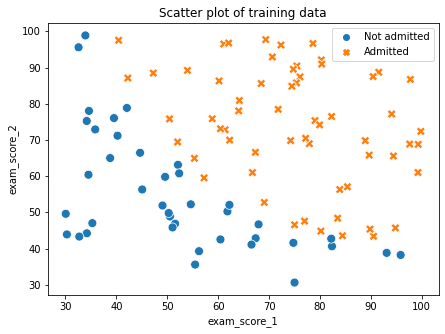

In [31]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2' ,hue='label',  data=data, style='label', s=80)
#handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

In [36]:
def sigmoid(Z):
  z=np.array(Z)
  return 1/(1+np.exp(-z))

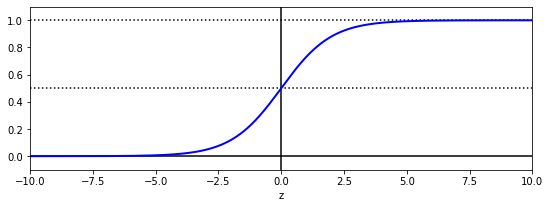

In [62]:
z = np.linspace(-10, 10, 1000)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [104]:
m = data.shape[0]
x = np.hstack((np.ones((m,1)),data[['exam_score_1', 'exam_score_2']].values))
y = np.array(data.label.values).reshape(-1,1)
theta = np.zeros(shape=(data.shape[1]))
print(x)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

In [147]:
def computecost(theat,x,y):
  m=data.shape[0]
  theta_0 = theta[:, np.newaxis]
  h=sigmoid(x.dot(theta_0))
  j=(1/m) * (-y.T.dot(np.log(h))- (1-y).T.dot(np.log(1-h)))
  diff_hy = h - y
  grad= (1/m) * diff_hy.T.dot(x)
  return j,grad

In [148]:
cost, grad = computecost(theta, x, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [154]:
import scipy.optimize as opt
def optimize_theta(x,y,theta):
  opt_result=opt.minimize(computecost, theta, args=(x, y), method='TNC',
                               jac=True, options={'maxiter':400})
  return opt_result['x'], opt_result['fun']

In [155]:
opt_theta, cost = optimize_theta(x, y, theta)

In [156]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: [[0.69314718]]
Expected cost (approx): 0.203
theta:
 [[2.04620127e-16]
 [2.45732742e-14]
 [2.30460420e-14]]
Expected theta (approx):
 -25.161
 0.206
 0.201
